In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("entorno listo")

entorno listo


# Viajes de Taxi en NYC – Análisis de Transporte y Operaciones

## Introducción
Los sistemas de transporte urbano generan grandes volúmenes de datos operacionales que pueden ser utilizados para comprender patrones de movilidad, eficiencia de los viajes y comportamiento de los costos.  
En este proyecto, se analiza un conjunto de datos de viajes en taxi en la ciudad de Nueva York con el objetivo de explorar la duración de los viajes, la distancia recorrida y otras características relevantes para el análisis de transporte y operaciones.

## Objetivos
Los principales objetivos de este análisis son:
- Explorar la estructura y la calidad del conjunto de datos de viajes en taxi
- Limpiar y preparar los datos para su análisis
- Identificar patrones en la duración y distancia de los viajes
- Detectar posibles valores atípicos y anomalías operacionales
- Extraer conclusiones relevantes para el análisis de transporte y operaciones

## Fuente de Datos
El conjunto de datos proviene de una competencia pública de Kaggle: **NYC Taxi Trip Duration**.  
Cada fila representa un viaje individual en taxi e incluye información sobre la hora de recogida, la hora de descenso, la duración del viaje, la distancia recorrida y otras variables relacionadas.

# NYC Taxi Trips – Transportation & Operations Analysis

## Introduction
Urban transportation systems generate large volumes of operational data that can be used to understand mobility patterns, trip efficiency, and cost behavior.  
In this project, I analyze a dataset of taxi trips in New York City to explore trip duration, distance, and fare characteristics.

## Objectives
The main objectives of this analysis are:
- Explore the structure and quality of the taxi trip dataset
- Clean and prepare the data for analysis
- Identify patterns in trip duration and distance
- Detect potential outliers and operational anomalies
- Extract insights relevant to transportation and operations analysis

## Data Source
The dataset comes from a publicly available Kaggle competition: **NYC Taxi Trip Duration**.  
Each row represents a single taxi trip with information about pickup time, dropoff time, trip duration, distance, and fare-related variables.


In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/train.csv")

# Basic inspection
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  str    
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  str    
 3   dropoff_datetime    1458644 non-null  str    
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  str    
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), str(4)
memory usage: 122.4 MB


In [4]:
df.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Initial Data Inspection Observations

- The dataset contains a mix of numerical and datetime-related variables.
- Datetime columns such as pickup and dropoff times are currently stored as object types and will need to be converted.
- Most numerical columns do not show missing values, but some variables may contain extreme values.
- Preliminary statistics suggest the presence of outliers in trip duration, which should be addressed during data cleaning.


## Data Cleaning

Based on the initial data inspection, several data quality issues were identified.  
In this section, the dataset is cleaned by correcting data types, removing invalid observations, and preparing the data for further analysis.


In [5]:
# Convert datetime columns to datetime type
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

df[["pickup_datetime", "dropoff_datetime"]].dtypes


pickup_datetime     datetime64[us]
dropoff_datetime    datetime64[us]
dtype: object

In [6]:
# Remove trips with invalid values
df = df[
    (df["trip_duration"] > 0) &
    (df["trip_duration"] < 24 * 60 * 60) &  # less than 24 hours
    (df["passenger_count"] > 0)
]


In [7]:
df.describe()


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458580e+06,1458580,1458580,1.458580e+06,1.458580e+06,1.458580e+06,1.458580e+06,1.458580e+06,1.458580e+06
mean,1.534954e+00,2016-04-01 10:11:39.451349,2016-04-01 10:27:32.235106,1.664599e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.527838e+02
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,1.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,2016-02-17 16:47:27.500000,2016-02-17 17:06:07.250000,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01,3.970000e+02
50%,2.000000e+00,2016-04-01 17:20:37,2016-04-01 17:36:53,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2016-05-15 03:57:35.500000,2016-05-15 04:12:07,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396302e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,8.639200e+04
std,4.987769e-01,NaN,NaN,1.314227e+00,7.090200e-02,3.288001e-02,7.064362e-02,3.588955e-02,3.170602e+03


In [8]:
# Remove trips with unusually high passenger counts
df = df[df["passenger_count"] <= 6]


In [9]:
# Remove extremely short trips
df = df[df["trip_duration"] >= 60]  # at least 1 minute


In [10]:
# Filter trips within reasonable NYC geographic bounds
df = df[
    (df["pickup_latitude"].between(40.5, 41.0)) &
    (df["dropoff_latitude"].between(40.5, 41.0)) &
    (df["pickup_longitude"].between(-74.5, -73.5)) &
    (df["dropoff_longitude"].between(-74.5, -73.5))
]


In [11]:
df.describe()


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.449646e+06,1449646,1449646,1.449646e+06,1.449646e+06,1.449646e+06,1.449646e+06,1.449646e+06,1.449646e+06
mean,1.535714e+00,2016-04-01 09:59:18.241991,2016-04-01 10:15:15.879350,1.666016e+00,-7.397358e+01,4.075099e+01,-7.397352e+01,4.075184e+01,9.576374e+02
min,1.000000e+00,2016-01-01 00:00:17,2016-01-01 00:03:31,1.000000e+00,-7.442106e+01,4.050629e+01,-7.447962e+01,4.050860e+01,6.000000e+01
25%,1.000000e+00,2016-02-17 16:36:45.750000,2016-02-17 16:52:56.250000,1.000000e+00,-7.399187e+01,4.073740e+01,-7.399133e+01,4.073594e+01,4.010000e+02
50%,2.000000e+00,2016-04-01 16:55:24.500000,2016-04-01 17:14:07,1.000000e+00,-7.398177e+01,4.075413e+01,-7.397977e+01,4.075455e+01,6.660000e+02
75%,2.000000e+00,2016-05-15 03:34:20.250000,2016-05-15 03:48:37,2.000000e+00,-7.396743e+01,4.076836e+01,-7.396311e+01,4.076981e+01,1.078000e+03
max,2.000000e+00,2016-06-30 23:59:39,2016-07-01 23:02:03,6.000000e+00,-7.350582e+01,4.099752e+01,-7.350127e+01,4.099984e+01,8.639200e+04
std,4.987231e-01,NaN,NaN,1.315380e+00,3.784471e-02,2.788845e-02,3.527308e-02,3.200576e-02,3.177675e+03


## Data Preparation

In this stage, new variables are created from existing data to support more detailed analysis.  
Datetime fields are used to extract temporal features that allow the exploration of time-based patterns in taxi trips.


In [12]:
# Create time-based features
df["pickup_hour"] = df["pickup_datetime"].dt.hour
df["pickup_day"] = df["pickup_datetime"].dt.day_name()
df["pickup_weekday"] = df["pickup_datetime"].dt.weekday


In [13]:
# Convert trip duration to minutes
df["trip_duration_min"] = df["trip_duration"] / 60


In [15]:
# Average trip duration by hour of day
avg_duration_by_hour = (
    df.groupby("pickup_hour")["trip_duration_min"]
    .mean()
    .reset_index()
)

avg_duration_by_hour.head()


,pickup_hour,trip_duration_min
0,0,15.100483
1,1,15.143467
2,2,14.949985
3,3,14.972228
4,4,15.579367


### Data Preparation Decisions

- Temporal features such as hour of day and day of week were extracted from pickup timestamps to enable time-based analysis.
- Trip duration was converted from seconds to minutes to improve interpretability.
- Aggregated tables were created to summarize average trip duration across different time periods.


## Exploratory Data Analysis (EDA)

In this section, the cleaned and prepared dataset is explored to answer the main data questions of the project.  
The analysis focuses on understanding the distribution of trip duration, identifying patterns across time, and examining relationships between key variables.


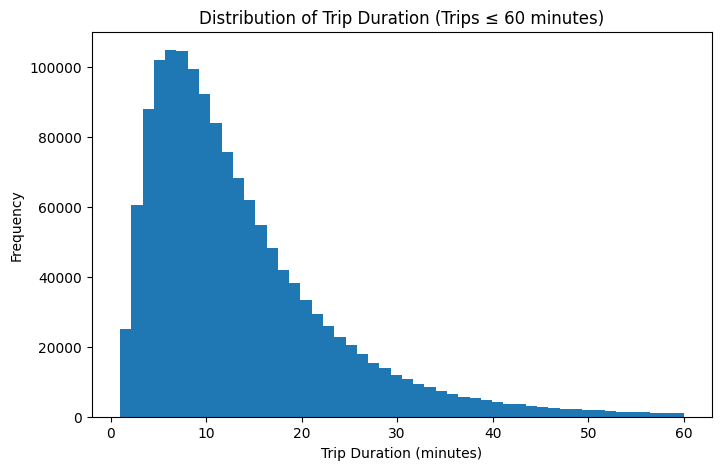

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df[df["trip_duration_min"] <= 60]["trip_duration_min"], bins=50)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Duration (Trips ≤ 60 minutes)")
plt.show()



The distribution of trip duration is highly right-skewed.  
Most taxi trips are relatively short, while a small number of trips last significantly longer, creating a long tail in the distribution.  
This pattern is consistent with urban transportation data and highlights the presence of outliers even after data cleaning.


In [18]:
df["trip_duration_min"].describe()


count    1.449646e+06
mean     1.596062e+01
std      5.296125e+01
min      1.000000e+00
25%      6.683333e+00
50%      1.110000e+01
75%      1.796667e+01
max      1.439867e+03
Name: trip_duration_min, dtype: float64

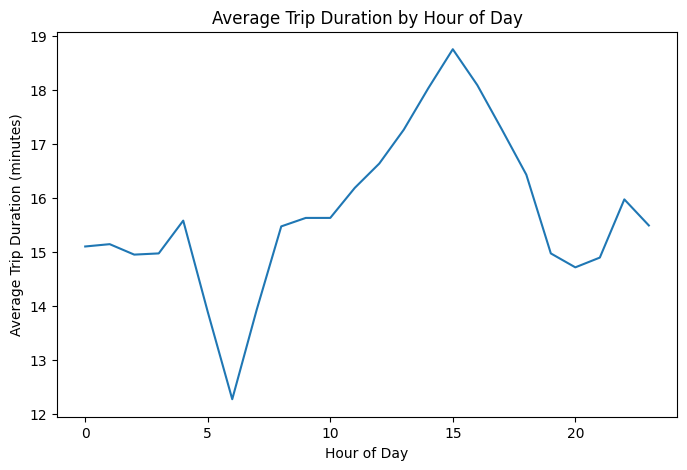

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(
    avg_duration_by_hour["pickup_hour"],
    avg_duration_by_hour["trip_duration_min"]
)
plt.xlabel("Hour of Day")
plt.ylabel("Average Trip Duration (minutes)")
plt.title("Average Trip Duration by Hour of Day")
plt.show()


In [22]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df["trip_distance_km"] = haversine(
    df["pickup_latitude"],
    df["pickup_longitude"],
    df["dropoff_latitude"],
    df["dropoff_longitude"]
)



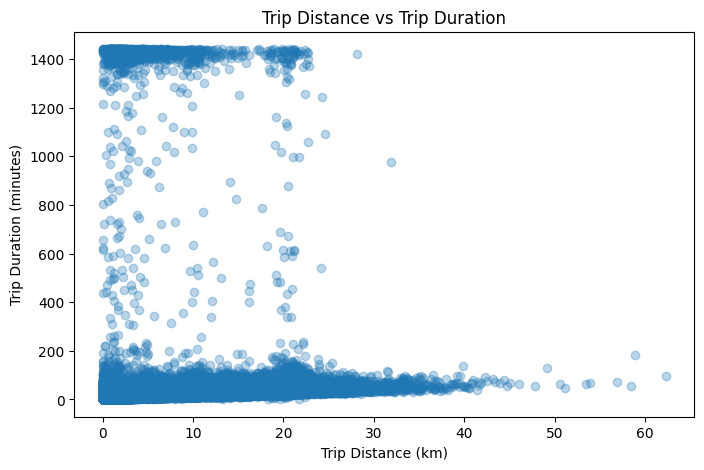

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(
    df["trip_distance_km"],
    df["trip_duration_min"],
    alpha=0.3
)
plt.xlabel("Trip Distance (km)")
plt.ylabel("Trip Duration (minutes)")
plt.title("Trip Distance vs Trip Duration")
plt.show()


The scatter plot shows a positive relationship between trip distance and trip duration.  
Longer trips generally take more time; however, there is noticeable variability, suggesting that traffic conditions and other factors also influence trip duration.


### EDA Findings

- Trip duration shows a right-skewed distribution, with most trips lasting a relatively short amount of time.
- Average trip duration varies throughout the day, suggesting temporal patterns in traffic and demand.
- There is a positive relationship between trip distance and trip duration, although variability increases for longer trips.
- Some dispersion in the data indicates that additional factors may influence trip duration beyond distance alone.


## Conclusions

This analysis examined New York City taxi trip data to better understand transportation and operational patterns, with a particular focus on trip duration and its relationship with time and distance.

Key insights from the analysis include:
- Taxi trip duration is highly right-skewed, with most trips lasting a short amount of time and a small number of trips exhibiting very long durations.
- Trip duration varies throughout the day, indicating that traffic conditions and demand levels influence travel time.
- There is a clear positive relationship between trip distance and trip duration; however, the wide dispersion observed suggests that distance alone does not fully explain trip duration.

Overall, the results were consistent with expectations for urban transportation data. The presence of outliers and variability highlights the complexity of real-world operational systems.

Some limitations of this analysis should be noted. The dataset does not include external factors such as traffic congestion, weather conditions, or fare details, which may significantly affect trip duration. Additionally, trip distance was estimated using geographic coordinates, which represents straight-line distance rather than the actual route taken.

Future work could incorporate additional data sources or apply predictive modeling techniques to better explain and forecast trip duration. Despite these limitations, this project demonstrates how data cleaning, preparation, and exploratory analysis can generate meaningful insights from large-scale transportation datasets.
